In [789]:
# Place here the same 6-digit number you selected for the first coursework. 
# Make sure that you keep a copy of this number and avoid trivial numbers, such as 000000 or 123456 -- thank you!
270179

270179

# Assignment 2 - Regression and Classification

Second assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This coursework aims to provide students with a comprehensive understanding of linear regression with polynomial basis functions and classification with K-nearest neighbours. Specifically, students will learn about key concepts related to the model's generalisation ability by changing the degree of the polynomial and the size of the dataset. In the second part of the coursework, students will delve into classification using the K-nearest neighbours algorithm. Finally, students will be introduced to the concept of using a validation set to select the optimal value of $K$ for their classification model. By the end of this coursework, students will have gained a solid understanding of these key concepts and be equipped with the skills to apply them in practical scenarios.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Polynomial Fitting Visualisation](#Polynomial-Fitting-Visualisation) (50%)
2. [Classification with KNN](#Classification-with-KNN) (50%)

In [790]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Polynomial Fitting Visualisation
In this exercise you will explore the effect that the degree of the polynomial and the size of the training data has on the model's performance and generalisation ability.

1. Generate a 2D dataset of 15 points $(x_i,y_i)$ for $i=1..15$ using a sine wave perturbed by a small gaussian noise --- this is very similar to what you did in the lab.
    - The $x_i$ should be equally spaced in the $[0-10]$ interval 
    - Use: $y_i = 4*sin(x_i) + \epsilon$, where $\epsilon$ is gaussian noise (with $\mu=0$ and $\sigma=1$).
    - To ensure reproducibility of your results, use (provided below): 
    `rng = np.random.default_rng(13)` and
    `random_state = np.random.RandomState(13)`
    
2. Split the points randomly into a training and testing sets of size 10 and 5, respectively.
    
3. Learn the weights of the linear regression for  polynomial models of degree $M$ for $M = 0..9$ . For each value of $M$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $M$. Your figure should be similar to Figure 1 from the Coursework document.

4. In the last part of this exercise, you will have to create more points for training (using the same sine wave perturbed by a small gaussian noise as described in point 1). For testing, you will continue to use the same 5 points you used in points 1 to 3. Learn the weights of the linear regression for  polynomial models of degree $M=9$ for training sets of size $N$ with $N=10:500:10$ (that is, from $N=10$ to $N=500$ in steps of $10$). For each value of $N$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $N$. Your figure should be similar to Figure 2 from the Coursework document.

* Note that for parts 3 and 4 you are supposed to write your code from scratch and you cannot use existing functions such as `PolynomialFeatures`, `LinearRegression` or `mean_squared_error`.
* _Observation: in this exercise we are not using the validation set because our goal is not to choose a specific model but rather to analyse the behaviour of the family of models._

### Generate the data

In [791]:
rng = np.random.default_rng(13)
random_state = np.random.RandomState(13)

In [792]:
# your code goes here:
noise = np.random.normal(0, 1, 15)
x = np.linspace(0, 10, 15)
y = 4 * np.sin(x) + noise

### Split the points into training and testing
Feel free to use `train_test_split(x, y, test_size = ?, random_state = random_state)`, remember to calculate the right proportion for the `test_size` so that you end up with 5 points in the testing set.

In [793]:
# your code goes here:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/3)

### Degree vs. RMSE
Generate the plot (as in __Figure 1__) of the RMSE during training and testing at different values of of the polynomial degree $M$.

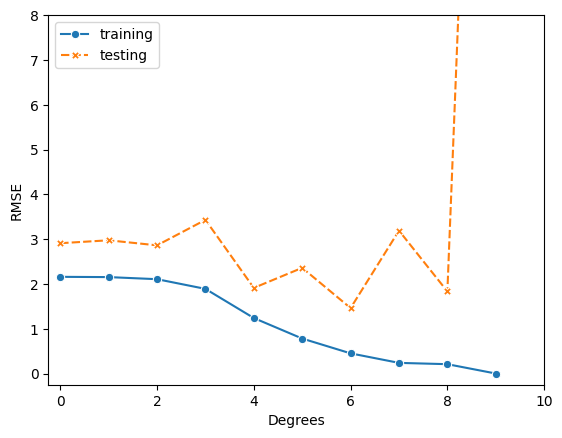

In [794]:
# your code goes here:
def linear_regression(X, y, list_of_degrees:list):
    """
        Realiza regressão linear para diferentes graus polinomiais.

        Args:
        - X (array): Array unidimensional de valores de entrada.
        - y (array): Array unidimensional de valores alvo.
        - list_of_degrees (list): Lista de graus polinomiais a serem considerados na regressão.

        Returns:
        - dict_w (dict): Um dicionário onde as chaves são os graus polinomiais e os valores são arrays de parâmetros
        da regressão linear correspondentes a cada grau.
        - dict_mat (dict): Um dicionário onde as chaves são os graus polinomiais e os valores são as matrizes de potências
        associadas a cada grau.
    """
    dict_w = dict()  # Dicionário para armazenar os parâmetros da regressão
    dict_mat = dict()  # Dicionário para armazenar as matrizes de potências

    for each_degree in list_of_degrees:
        # Inicializa a matriz que será preenchida com as potências
        mat_phi = np.zeros((len(X), each_degree + 1))

        # Preenche a matriz com potências do vetor X
        for i in range(each_degree + 1):
            mat_phi[:, i] = np.power(X, i)

        # Calcula a pseudoinversa
        X_pseudo_inv = np.linalg.pinv(mat_phi)

        # Multiplica a pseudoinversa pelo vetor alvo e encontra os parâmetros
        w = np.dot(X_pseudo_inv, y)

        # Adiciona no dicionário de grau como chave e o array de parâmetros como valor
        dict_w[each_degree] = w

        # Adiciona a matriz de potências ao dicionário
        dict_mat[each_degree] = mat_phi

    return dict_w, dict_mat

dict_w, dict_mat = linear_regression(X_train, y_train, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

dict_rmse_train = dict()
dict_rmse_test = dict()

for each_degree in range(len(dict_w)):
    # DADOS DE TREINO

    # calcula a predição
    y_pred = np.dot(dict_mat[each_degree], np.transpose(dict_w[each_degree]))

    # calcula o RMSE
    rmse_train = np.sqrt(np.mean(np.power(y_train - y_pred, 2)))

    # adiciona no dicionário o RMSE para cada grau
    dict_rmse_train[each_degree] = rmse_train

    # DADOS DE TESTE

    # vai inicializar a matriz phi
    mat_phi = np.zeros((len(X_test), each_degree + 1))

    # preenche a matriz phi com as potências do vetor X_test
    for i in range(each_degree + 1):
            mat_phi[:, i] = np.power(X_test, i)

    # calcula a predição
    y_pred = np.dot(mat_phi, np.transpose(dict_w[each_degree]))

    # calcula o RMSE
    rmse_test = np.sqrt(np.mean(np.power(y_test - y_pred, 2)))

    # adiciona no dicionário o RMSE para cada grau
    dict_rmse_test[each_degree] = rmse_test

# criando dataframes com os RMSE
df1 = pd.DataFrame(dict_rmse_train.items(), columns=["Degrees", "RMSE"])
df1["Type"] = "training"
df2 = pd.DataFrame(dict_rmse_test.items(), columns=["Degrees", "RMSE"])
df2["Type"] = "testing"

# unindo os dataframes
merged_df = pd.concat([df1, df2]).reset_index(drop=True)

sns.lineplot(data=merged_df, x="Degrees", y="RMSE", hue="Type", style="Type", markers=True)
plt.ylim(bottom = -0.25, top = 8)
plt.xlim(left = -0.25, right = 10)
plt.legend()
plt.show()

### Training set size vs. RMSE
Generate the plot (as in __Figure 2__) of the RMSE during training and testing at different training set sizes $N$.

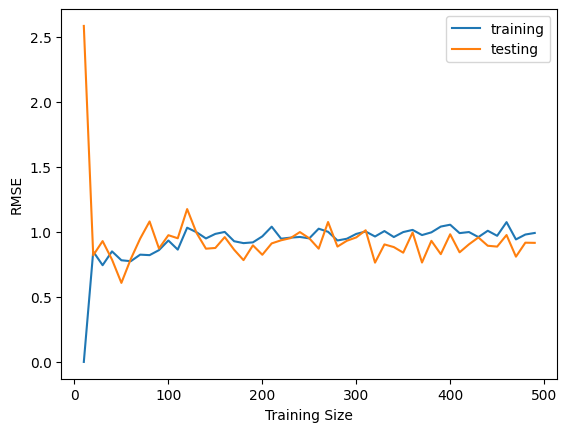

In [805]:
# your code goes here:
dict_N_train = dict()
dict_N_test = dict()

for N in range(10, 500, 10):

    # gerando os pontos
    noise = np.random.normal(0, 1, N)
    X_train = np.linspace(0, 10, N)
    y_train = 4 * np.sin(X_train) + noise

    # DADOS DE TREINO
    
    # aprendendo os parâmetros para grau 9
    dict_w, dict_mat = linear_regression(X_train, y_train, [9])

    # usando os parâmetros para prever
    y_pred = np.dot(dict_mat[9], np.transpose(dict_w[9]))
    
    # calculando o RMSE para cada N
    rmse_train = np.sqrt(np.mean(np.power(y_train - y_pred, 2)))

    # adicionando o RMSE no dicionário de treino
    dict_N_train[N] = rmse_train

    # DADOS DE TESTE

    # vai inicializar a matriz phi para grau 9
    mat_phi = np.zeros((len(X_test), 10))

    # preenche a matriz phi com as potências do vetor X_test
    for i in range(10):
            mat_phi[:, i] = np.power(X_test, i)

    # calcula a predição com o vetor de parâmetros apreendidos acima
    y_pred = np.dot(mat_phi, np.transpose(dict_w[9]))

    # calcula o RMSE
    rmse_test = np.sqrt(np.mean(np.power(y_test - y_pred, 2)))

    # adiciona no dicionário o RMSE para cada grau
    dict_N_test[N] = rmse_test

# criando dataframes com os RMSE
df1 = pd.DataFrame(dict_N_train.items(), columns=["Training Size", "RMSE"])
df1["Type"] = "training"
df2 = pd.DataFrame(dict_N_test.items(), columns=["Training Size", "RMSE"])
df2["Type"] = "testing"

# unindo os dataframes
merged_df = pd.concat([df1, df2]).reset_index(drop=True)

sns.lineplot(data=merged_df, x="Training Size", y="RMSE", hue="Type", markers=True)
plt.legend()
plt.show()

# Classification with KNN
In this exercise you will implement the K-nearest neighbours (K-NN) algorithm for multi-class classification and use it to classify the Wine dataset. You will also need to determine the optimal value of $K$ using the accuracy on a validation set and report the test set performance based on the accuracy.

Dataset: The Wine dataset contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The dataset contains 178 observations, with 13 attributes each. There are three different classes of wines.

Specifically:
1. 1.	Load the Wine dataset and split it into a training set ($70\%$), a validation set ($15\%$), and a testing set ($15\%$).
    
2. You will write code that implements the K-NN algorithm for multi-class classification. Use Euclidean distance as the distance metric.
    - _Obs: it is better if you take only odd values of K, considering you are predicting the class based on the majority of the neighbours._


3. Use the K-NN algorithm on the training set for a range of values of $K$ and evaluate its performance on the validation set using the accuracy. Plot the accuracy on the validation set against the range of values that were tried for $K$. Your plot should look like Figure 3. 
    - *Observation: it is better if you take only odd values of K, considering you are predicting the class based on the majority of the neighbours.*
    - **You will also have to implement the accuracy-score from scratch.**


4. 	Choose the value of $K$ that gives the best accuracy score in point 3 and report the accuracy of the K-NN algorithm on the test set using the selected value of $K$.
	- *Observation: when obtaining the predictions for the testing set, remember to include the validation set in your training set.*



* __Note:__ You are not allowed to use any Python libraries such as scikit-learn to implement the K-NN algorithm or to calculate distances or the accuracy score. You may use numpy or other basic libraries for matrix operations.
    
    

### Preparing the dataset

Load the dataset and generate the training, validation and testing sets.

In [806]:
X_wine = pd.read_csv('X_wine.csv')
y_wine = pd.read_csv('y_wine.csv')

Let's inspect the dataset. There are 13 features and one target column

In [807]:
X_wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We can inspect the class distribution by using `value_counts()` on the target variable

In [798]:
y_wine.value_counts()

class
2        71
1        59
3        48
Name: count, dtype: int64

Now you will write code to split the data into training ($70\%$), validation ($15\%$), and testing ($15\%$). 

You can use `train_test_split()` but make sure to calculate the right proportions and remember that this only returns 2 different sets, not 3.

In [809]:
# set the random_state for reproducibilty of your results
random_state = 113

In [839]:
# your code goes here:
X_train, X_temp, y_train, y_temp = train_test_split(X_wine, y_wine, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### Here you will implement the KNN algorithm using the euclidean distance

In [812]:
def euclidean_dist(x1, x2):
    """
    Calcula a distância euclidiana entre dois pontos.

    Args:
    - x1 (array): Array representando as coordenadas do primeiro ponto.
    - x2 (array): Array representando as coordenadas do segundo ponto.

    Returns:
    - float: A distância euclidiana entre os pontos x1 e x2.
    """
    # Cria um vetor com a diferença entre cada uma das entradas
    difference_array = x1 - x2

    # Eleva essas diferenças individualmente ao quadrado
    squared_array = np.power(difference_array, 2)

    # Soma todas essas diferenças ao quadrado
    sum_of_squares = np.sum(squared_array)

    # Tira a raiz quadrada da soma
    euclidean_distance = np.sqrt(sum_of_squares)

    return euclidean_distance
    

In [ ]:
def knn_predict(X=X_train, y=y_train, K=5):
    """
    """
    df_copy = X
    df_copy["Pred"] = None

    dict_distance = dict()
    for i in range(X.shape[0]):
        # vou criar um dicionário vazio onde vou adicionar as distâncias
        dict_distance_for_each_row = dict()

        for j in range(X.shape[0]):

            if euclidean_dist(X.iloc[i], X.iloc[j]) != 0:
                dict_distance_for_each_row[j] = euclidean_dist(X.iloc[i], X.iloc[j])
            
        dict_distance[i] = dict_distance_for_each_row
    
    df_temp = pd.DataFrame(dict_distance)
    
    for each_columns in df_temp.columns:
        df_temp = df_temp.sort_values(by=each_columns, ascending=True)
        df_temp = df_temp.head(K)
        index = list(df_temp.index)
        list_of_KNN = list()
        for each_index in index:
            list_of_KNN.append(y["class"].iloc(each_index))
            

# ACABEI ADIQUIRINDO UMA INFECÇÃO DE OUVIDO MUITO FORTE, DURANTE GRANDE PARTE DO PEÍODO EM QUE ESSA TAREFA ESTEVE DISPONÍVEL 
# POR ISSO VOU ENVIAR APENAS A PRIMEIRA PARTE, QUE FOI O QUE CONSEGUI FAZER, E ASSIM POSSO CONSEGUIR AO MENOS METADE DOS PONTOS
# ESTOU APENAS ME JUSTIFICANDO PARA QUE NÃO FIQUE UMA SENSAÇÃO DE DESCASO DA MINHA PARTE

knn_predict()

### Select the optimal $K$ by plotting the accuracy score in the validation set at different values of $K$

First create a function that calculates the accuracy score

In [ ]:
def calculate_acc_score():
    # your code goes here:
    
    

Generate the plot and select the optimal $K$

In [ ]:
# your code goes here:



Calculate the test set performance using the optimal $K$

In [ ]:
# your code goes here:

